In [4]:
import cv2
import matplotlib.pyplot as py
import os
from keras.preprocessing.image import img_to_array,load_img

In [5]:
path1=r"D:\data_deep\Burglary"
path2=r"D:\data_deep\normal"
path3=r"D:\data_deep\shoplifiting"
path4=r"D:\data_deep\VAndaslim"

In [6]:
file1=os.listdir(path1)
file2=os.listdir(path2)
file3=os.listdir(path3)
file4=os.listdir(path4)

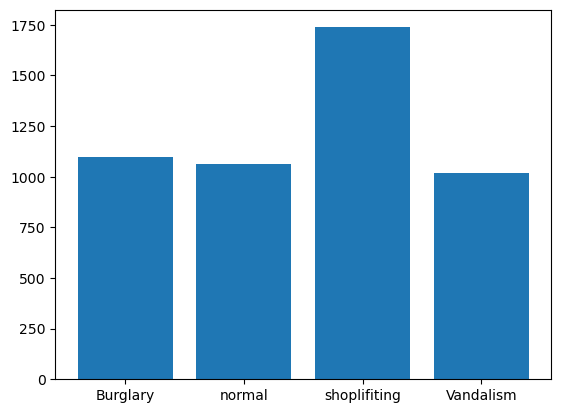

In [10]:
#py.hist(len(file1))
py.bar(["Burglary","normal","shoplifiting","Vandalism"],[len(file1),len(file2),len(file3),len(file4)])
#py.hist(len(file3))
#py.hist(len(file4))
py.show()

In [12]:
x_data=[]
y_data=[]
def fun(path,file,y_label):
    for i in range(len(file)):
        img=cv2.imread(path+"\\"+file[i])
        img=cv2.resize(img,(224,224))
        #gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #edges = cv2.Canny(gray, 150, 300)
        array=img_to_array(img)
        x_transform=array.astype("float32")/255
        x_data.append(x_transform)
        y_data.append(y_label)

In [14]:
fun(path1,file1,[1,0,0,0])
fun(path2,file2,[0,1,0,0])
fun(path3,file3,[0,0,1,0])
fun(path4,file4,[0,0,0,1])

In [16]:
import numpy as np
x=np.array(x_data)
y=np.array(y_data)

In [20]:
from sklearn.model_selection import train_test_split

# Assuming x_data and y_data are your full dataset
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [23]:
np.save("x_train.npy",x)
np.save("y_train.npy",y)
np.save("x_test.npy",x_test)
np.save("y_test.npy",y_test)
np.save("x_val.npy",x_val)
np.save("y_val.npy",y_val)